<h1> Text-Based Emotion Detection Using RandomForest Algorithm<h1>

- import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
import spacy

- Data loading

In [2]:
data = pd.read_csv("C:/Users/Hp/Desktop/works/tweet_emotions.csv")
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


- Exploratory Data Analysis

In [3]:
data.shape

(40000, 3)

-  The tweets dataset contains 40,000 rows of tweets and 3 columns headers

In [4]:
data.sentiment.value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

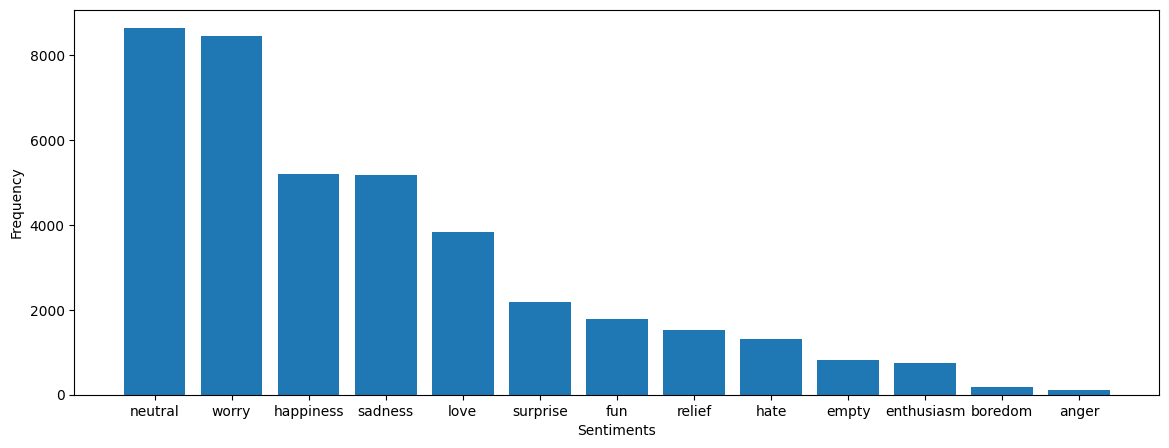

In [5]:
to_plot = data.sentiment.value_counts()

plt.figure(figsize=(14, 5))
plt.bar(to_plot.index, to_plot.values)
plt.ylabel("Frequency")
plt.xlabel("Sentiments")
plt.show()

In [6]:
data.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data = data.drop('tweet_id', axis=1)

In [9]:
data.columns

Index(['sentiment', 'content'], dtype='object')

<h2> Data Preprocessing <h2>

In [10]:
nlp = spacy.load("en_core_web_lg")

In [11]:
def preprocess_content(text):
    
    word = nlp(text)
    filtered_tokens = []

    for tokens in word:
        if tokens.is_stop or tokens.is_punct or tokens.text.startswith("@"): 
            continue
        filtered_tokens.append(tokens.lemma_.lower())

    return " ".join(filtered_tokens)

In [12]:
data["preprocessed_texts"] = data['content'].apply(preprocess_content)

In [13]:
data.head()

,sentiment,content,preprocessed_texts
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit early start freakin =[
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,want trade houston ticket


In [14]:
print(data.sentiment)

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object


In [15]:
# according to the new_labels in conjuction with value count
count_neutral,count_worry,count_happiness,count_sadness,count_love,count_surprise,count_anger,count_fun,count_relief,count_hate,count_empty,count_enthusiasm,count_boredom = data.sentiment.value_counts()
count_neutral,count_worry,count_happiness,count_sadness,count_love,count_surprise,count_anger,count_fun,count_relief,count_hate,count_empty,count_enthusiasm,count_boredom

(8638, 8459, 5209, 5165, 3842, 2187, 1776, 1526, 1323, 827, 759, 179, 110)

- Since there is imbalance in the labels, Oversampling method will be applied to balance the dataset which involves populating the minority labels to be equal to the majority label.

In [16]:
# create DataFrames for each count class
df_class_neutral = data[data['sentiment']== 'neutral']
df_class_worry = data[data['sentiment']=='worry']
df_class_happiness = data[data['sentiment']== 'happiness']
df_class_sadness = data[data['sentiment']== 'sadness']
df_class_love = data[data['sentiment']== 'love']
df_class_surprise = data[data['sentiment']== 'surprise']
df_class_anger = data[data['sentiment']== 'anger']
df_class_fun = data[data['sentiment']=='fun']
df_class_relief = data[data['sentiment']== 'relief']
df_class_hate = data[data['sentiment']== 'hate']
df_class_empty = data[data['sentiment']== 'empty'] 
df_class_enthusiasm = data[data['sentiment']== 'enthusiasm']
df_class_boredom = data[data['sentiment']== 'boredom']

In [17]:
df_class_neutral_over = df_class_neutral.sample(count_neutral, replace =True)
df_class_worry_over = df_class_worry.sample(count_neutral, replace=True)
df_class_happiness_over = df_class_happiness.sample(count_neutral, replace=True)
df_class_sadness_over = df_class_sadness.sample(count_neutral, replace=True)
df_class_love_over = df_class_love.sample(count_neutral, replace=True)
df_class_surprise_over = df_class_surprise.sample(count_neutral, replace=True)
df_class_anger_over = df_class_anger.sample(count_neutral, replace=True)
df_class_fun_over = df_class_fun.sample(count_neutral, replace=True)
df_class_relief_over = df_class_relief.sample(count_neutral, replace=True)
df_class_hate_over = df_class_hate.sample(count_neutral, replace=True)
df_class_empty_over = df_class_empty.sample(count_neutral, replace=True)
df_class_enthusiasm_over = df_class_enthusiasm.sample(count_neutral, replace=True)
df_class_boredom_over = df_class_boredom.sample(count_neutral, replace=True)

In [18]:
oversampled_data = pd.concat([df_class_neutral_over, df_class_worry_over,df_class_happiness_over,df_class_sadness_over,df_class_love_over,
                          df_class_surprise_over, df_class_anger_over, df_class_fun_over,df_class_relief_over,
                          df_class_hate_over,df_class_empty_over,df_class_enthusiasm_over,df_class_boredom_over], axis=0)

print(oversampled_data.sentiment.value_counts())

sentiment
neutral       8638
worry         8638
happiness     8638
sadness       8638
love          8638
surprise      8638
anger         8638
fun           8638
relief        8638
hate          8638
empty         8638
enthusiasm    8638
boredom       8638
Name: count, dtype: int64


In [19]:
oversampled_data.sentiment.value_counts()

sentiment
neutral       8638
worry         8638
happiness     8638
sadness       8638
love          8638
surprise      8638
anger         8638
fun           8638
relief        8638
hate          8638
empty         8638
enthusiasm    8638
boredom       8638
Name: count, dtype: int64

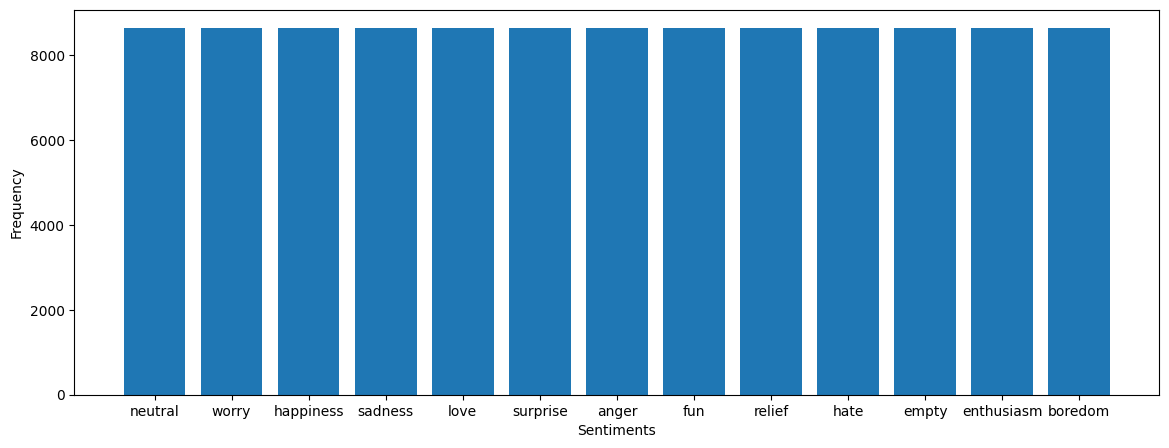

In [20]:
sampled_sentiment_plot = oversampled_data.sentiment.value_counts()

plt.figure(figsize=(14, 5))
plt.bar(sampled_sentiment_plot.index, sampled_sentiment_plot.values)
plt.ylabel("Frequency")
plt.xlabel("Sentiments")
plt.show()

In [21]:
encoder = LabelEncoder()

oversampled_data['new_label'] = encoder.fit_transform(oversampled_data['sentiment'])
oversampled_data

,sentiment,content,preprocessed_texts,new_label
36235,neutral,horseback riding,horseback ride,8
9028,neutral,boo (but will I listen?),boo listen,8
24134,neutral,gotta share this http://bit.ly/19OL1b,get to share http://bit.ly/19ol1b,8
21824,neutral,"morning, how is everone? sing to me You tuck ...",morning everone sing tuck turn light keep sa...,8
39580,neutral,Changing Guitar strings.. Getting Ready To Per...,change guitar string get ready perform climb c...,8
...,...,...,...,...
16463,boredom,my neighbours are far too loud in thier back g...,neighbour far loud thi garden hear loud woman ...,1
7465,boredom,I want to go to my home!!! D: I don't like sta...,want home d like stay work,1
12383,boredom,is stuck in traffic,stick traffic,1
17078,boredom,tired as fuck. it's pissing down with rain. i ...,tired fuck piss rain miss summer,1


In [22]:
oversampled_data.head()

,sentiment,content,preprocessed_texts,new_label
36235,neutral,horseback riding,horseback ride,8
9028,neutral,boo (but will I listen?),boo listen,8
24134,neutral,gotta share this http://bit.ly/19OL1b,get to share http://bit.ly/19ol1b,8
21824,neutral,"morning, how is everone? sing to me You tuck ...",morning everone sing tuck turn light keep sa...,8
39580,neutral,Changing Guitar strings.. Getting Ready To Per...,change guitar string get ready perform climb c...,8


In [23]:
oversampled_data.shape

(112294, 4)

- After handling class imbalance, the total size of the preprocessed data increases to 112,294 tweets.

In [24]:
x = oversampled_data['preprocessed_texts'] # use the preprocessed tweets from the balanced data

y = oversampled_data['new_label']

<h2> Model Training

- Data Splitting: 80% for training and 20% for testing

In [25]:
x.shape

(112294,)

In [26]:
y.shape

(112294,)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Transformation <br> TD-IDF Feature extraction technique will be applied to convert the preprocessed text into numerical feature (matrix form)<br>

Then the transformed tweets is fed into a pipeline with the Random forest Classifier for training.

In [28]:
ran_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rand', RandomForestClassifier(n_estimators=100,criterion='gini'))
])

ran_model.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rand', RandomForestClassifier())])

<h2> Model Evaluation <h2>

In [29]:
rand_ypred = ran_model.predict(x_test)

print(classification_report(y_test, rand_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1755
           1       0.97      1.00      0.98      1695
           2       0.86      0.98      0.91      1652
           3       0.97      0.97      0.97      1704
           4       0.95      0.97      0.96      1750
           5       0.84      0.80      0.82      1709
           6       0.96      0.99      0.97      1806
           7       0.88      0.87      0.88      1740
           8       0.73      0.68      0.70      1763
           9       0.91      0.97      0.94      1674
          10       0.84      0.80      0.82      1752
          11       0.93      0.94      0.93      1720
          12       0.78      0.67      0.72      1739

    accuracy                           0.89     22459
   macro avg       0.89      0.90      0.89     22459
weighted avg       0.89      0.89      0.89     22459



In [30]:
f1 = f1_score(y_test, rand_ypred, average='weighted')
precision = precision_score(y_test, rand_ypred, average='weighted')
recall = recall_score(y_test, rand_ypred, average='weighted')
accuracy = accuracy_score(y_test, rand_ypred)

print("Rand Forest Classifier Model Evaluation")
print("Accuracy score:", "{:.2f}".format(round(accuracy, 2)))
print("F1 score:", "{:.2f}".format(round(f1, 2)))
print("Precision score:", "{:.2f}".format(round(precision, 2)))
print("Recall score:", "{:.2f}".format(round(recall, 2)))

Rand Forest Classifier Model Evaluation
Accuracy score: 0.89
F1 score: 0.89
Precision score: 0.89
Recall score: 0.89


- Confusion matrix

In [31]:
conf_mat = confusion_matrix(y_test, rand_ypred)
conf_mat

array([[1755,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0, 1695,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    9, 1618,    0,    3,    2,    0,    0,    9,    6,    1,
           0,    4],
       [   0,    7,   11, 1659,    0,    0,    0,    0,   14,   10,    0,
           0,    3],
       [   0,    0,   12,    4, 1694,   12,    0,    3,    8,    3,    5,
           3,    6],
       [   1,    2,   23,    6,   28, 1361,    1,   80,   87,   38,   14,
          19,   49],
       [   1,    6,    1,    1,    0,    0, 1788,    0,    0,    0,    3,
           0,    6],
       [   0,    0,   20,    7,    5,   76,    2, 1522,   50,   19,   10,
           9,   20],
       [   2,   11,  118,   16,   23,   65,   13,   53, 1200,   42,   70,
          43,  107],
       [   0,    2,    8,    5,    2,    4,    1,    8,    3, 1632,    3,
           1,    5],
       [   0,   11,   21,    2,    9,   34,   34, 

Text(0.5, 1.0, 'TBED Confusion Matrix')

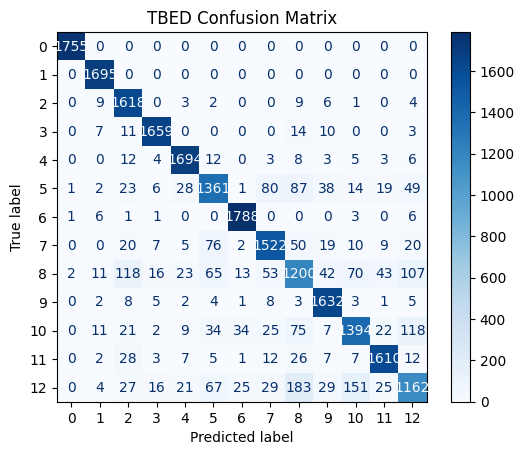

In [32]:
ConfusionMatrixDisplay(conf_mat).plot(cmap='Blues')
plt.title("TBED Confusion Matrix")

- Save the model for deployment

In [33]:
import joblib
joblib.dump(ran_model, "TBED model.joblib")

['TBED model.joblib']